In [49]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import plotly.offline as ply

In [2]:
# Download data

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
# Load data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing_df=load_housing_data()
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Histogram of all features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26dc1898>,
      dtype=object)

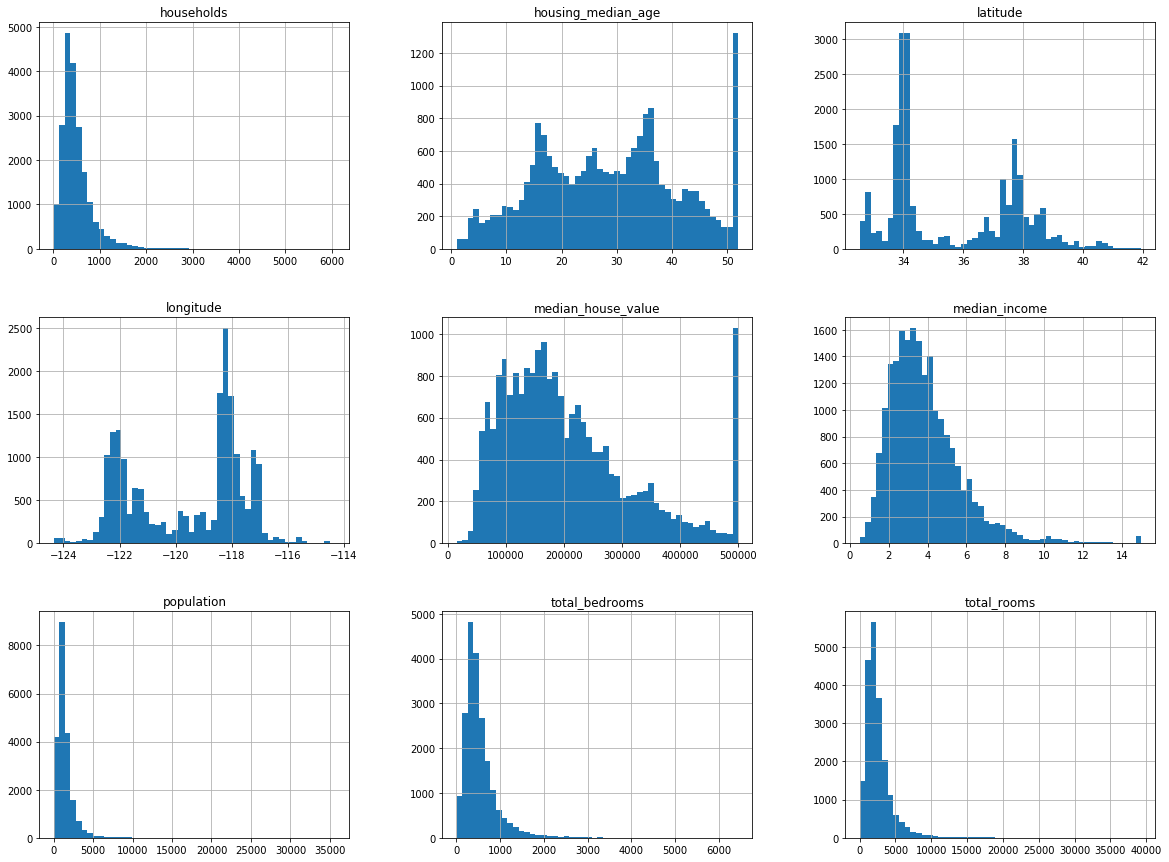

In [9]:
%matplotlib inline
housing_df.hist(bins=50,figsize=(20,15))

In [10]:
# Split data into train and test sets

train_set,test_set=train_test_split(housing_df,test_size=0.2,random_state=42)

In [11]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [12]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        3921 non-null float64
population            4128 non-null float64
households            4128 non-null float64
median_income         4128 non-null float64
median_house_value    4128 non-null float64
ocean_proximity       4128 non-null object
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


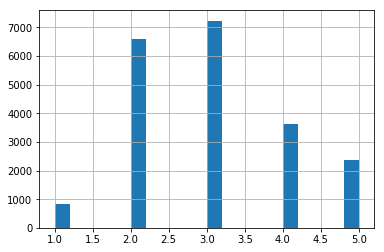

In [13]:
housing_df['income_cat']=np.ceil(housing_df['median_income']/1.5)
housing_df["income_cat"].where(housing_df["income_cat"] < 5, 5.0, inplace=True)
housing_df['income_cat'].hist(bins=20)

In [14]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for train_index, test_index in sss.split(housing_df, housing_df['income_cat']):
    strat_train_set=housing_df.iloc[train_index]
    strat_test_set=housing_df.iloc[test_index]

In [15]:
strat_train_set.drop('income_cat',axis=1,inplace=True)
strat_test_set.drop('income_cat',axis=1,inplace=True)

/Users/z002r1g/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [16]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11392,-117.97,33.73,27.0,2097.0,325.0,1217.0,331.0,5.7121,222500.0,<1H OCEAN
2275,-119.78,36.80,34.0,2200.0,493.0,1243.0,431.0,1.8514,66500.0,INLAND
4920,-118.25,34.00,36.0,1176.0,309.0,1267.0,292.0,1.6382,105000.0,<1H OCEAN
15781,-122.41,37.77,52.0,1963.0,565.0,1628.0,524.0,2.6083,193800.0,NEAR BAY
16188,-121.31,37.96,48.0,1112.0,227.0,583.0,216.0,2.3393,77600.0,INLAND


In [17]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 11392 to 12666
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16345 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [18]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 9385 to 16263
Data columns (total 10 columns):
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        4088 non-null float64
population            4128 non-null float64
households            4128 non-null float64
median_income         4128 non-null float64
median_house_value    4128 non-null float64
ocean_proximity       4128 non-null object
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [19]:
# Create a copy of training set for visualization and gaining insights
housing=strat_train_set.copy()

### Scatterplot showing density of population

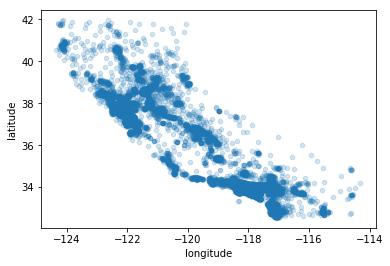

In [20]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.2)

### Scatterplot showing `median_house_value` as differenet colors and `population` as different sizes

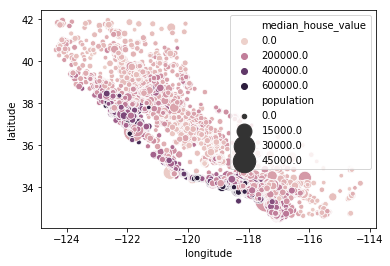

In [21]:
sns.scatterplot(x='longitude',y='latitude',size='population',sizes=(20,500),hue='median_house_value',data=housing)
plt.rcParams['figure.figsize']=(20,20)
plt.show()

### Pairplot of the following features:
- median_house_value
- median_income
- total_rooms
- housing_median_age

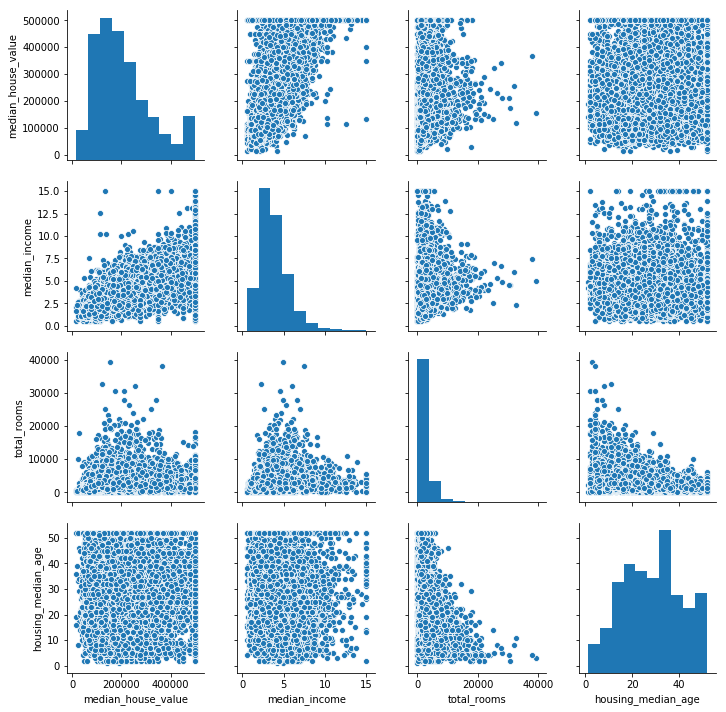

In [22]:
features=housing[["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]]
sns.pairplot(features)
plt.rcParams['figure.figsize']=(12,8)
plt.show()

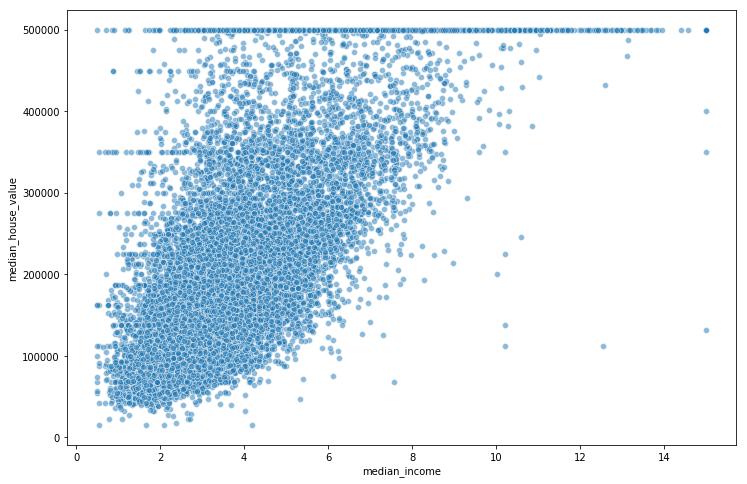

In [23]:
sns_plot= sns.scatterplot(x='median_income',y='median_house_value',data=housing,alpha=0.5)
fig=sns_plot.get_figure()
plt.rcParams['figure.figsize']=(10,8)
plt.show()

### Make some new features

In [24]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [25]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
11392,-117.97,33.73,27.0,2097.0,325.0,1217.0,331.0,5.7121,222500.0,<1H OCEAN,6.335347,0.154983,3.676737
2275,-119.78,36.80,34.0,2200.0,493.0,1243.0,431.0,1.8514,66500.0,INLAND,5.104408,0.224091,2.883991
4920,-118.25,34.00,36.0,1176.0,309.0,1267.0,292.0,1.6382,105000.0,<1H OCEAN,4.027397,0.262755,4.339041
15781,-122.41,37.77,52.0,1963.0,565.0,1628.0,524.0,2.6083,193800.0,NEAR BAY,3.746183,0.287825,3.106870
16188,-121.31,37.96,48.0,1112.0,227.0,583.0,216.0,2.3393,77600.0,INLAND,5.148148,0.204137,2.699074


In [26]:
correlation_matrix=housing.corr()
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924481,-0.115454,0.046954,0.072247,0.102303,0.058967,-0.014038,-0.046853,-0.030296,0.091873,0.002748
latitude,-0.924481,1.000000,0.017999,-0.037520,-0.068407,-0.110683,-0.073498,-0.084158,-0.144142,0.107722,-0.112209,-0.003874
housing_median_age,-0.115454,0.017999,1.000000,-0.360261,-0.320483,-0.297223,-0.302911,-0.109336,0.111855,-0.143804,0.127689,0.011609
total_rooms,0.046954,-0.037520,-0.360261,1.000000,0.930708,0.856209,0.918391,0.195279,0.130497,0.128077,-0.183877,-0.022613
total_bedrooms,0.072247,-0.068407,-0.320483,0.930708,1.000000,0.876612,0.980228,-0.009703,0.047644,-0.001384,0.093398,-0.026170
population,0.102303,-0.110683,-0.297223,0.856209,0.876612,1.000000,0.905574,0.002998,-0.027475,-0.072120,0.041963,0.068070
households,0.058967,-0.073498,-0.302911,0.918391,0.980228,0.905574,1.000000,0.010997,0.064125,-0.080953,0.074689,-0.025044
median_income,-0.014038,-0.084158,-0.109336,0.195279,-0.009703,0.002998,0.010997,1.000000,0.687443,0.315212,-0.622569,0.020107
median_house_value,-0.046853,-0.144142,0.111855,0.130497,0.047644,-0.027475,0.064125,0.687443,1.000000,0.148086,-0.257569,-0.020963
rooms_per_household,-0.030296,0.107722,-0.143804,0.128077,-0.001384,-0.072120,-0.080953,0.315212,0.148086,1.000000,-0.409364,-0.006123


In [27]:
correlation_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687443
rooms_per_household         0.148086
total_rooms                 0.130497
housing_median_age          0.111855
households                  0.064125
total_bedrooms              0.047644
population_per_household   -0.020963
population                 -0.027475
longitude                  -0.046853
latitude                   -0.144142
bedrooms_per_room          -0.257569
Name: median_house_value, dtype: float64

### Create fresh training data and labels

In [28]:
housing=strat_train_set.drop('median_house_value',axis=1)
housing_labels=strat_train_set['median_house_value'].copy()

In [29]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
11392,-117.97,33.73,27.0,2097.0,325.0,1217.0,331.0,5.7121,<1H OCEAN
2275,-119.78,36.80,34.0,2200.0,493.0,1243.0,431.0,1.8514,INLAND
4920,-118.25,34.00,36.0,1176.0,309.0,1267.0,292.0,1.6382,<1H OCEAN
15781,-122.41,37.77,52.0,1963.0,565.0,1628.0,524.0,2.6083,NEAR BAY
16188,-121.31,37.96,48.0,1112.0,227.0,583.0,216.0,2.3393,INLAND


In [30]:
housing_labels.head()

11392    222500.0
2275      66500.0
4920     105000.0
15781    193800.0
16188     77600.0
Name: median_house_value, dtype: float64

### Handle missing data

In [31]:
imputer=SimpleImputer(strategy='median')
housing_num=housing.drop('ocean_proximity',axis=1)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
11392,-117.97,33.73,27.0,2097.0,325.0,1217.0,331.0,5.7121
2275,-119.78,36.80,34.0,2200.0,493.0,1243.0,431.0,1.8514
4920,-118.25,34.00,36.0,1176.0,309.0,1267.0,292.0,1.6382
15781,-122.41,37.77,52.0,1963.0,565.0,1628.0,524.0,2.6083
16188,-121.31,37.96,48.0,1112.0,227.0,583.0,216.0,2.3393


In [32]:
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [33]:
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2125.     ,  434.     ,
       1163.     ,  408.     ,    3.53175])

In [34]:
X=imputer.transform(housing_num)
housing_tf=pd.DataFrame(X,columns= housing_num.columns)
housing_tf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.97,33.73,27.0,2097.0,325.0,1217.0,331.0,5.7121
1,-119.78,36.80,34.0,2200.0,493.0,1243.0,431.0,1.8514
2,-118.25,34.00,36.0,1176.0,309.0,1267.0,292.0,1.6382
3,-122.41,37.77,52.0,1963.0,565.0,1628.0,524.0,2.6083
4,-121.31,37.96,48.0,1112.0,227.0,583.0,216.0,2.3393


In [35]:
housing_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


In [36]:
housing_cat=housing['ocean_proximity']
housing_cat.value_counts()

<1H OCEAN     7288
INLAND        5234
NEAR OCEAN    2136
NEAR BAY      1852
ISLAND           2
Name: ocean_proximity, dtype: int64

### Encode categorical values to integer

In [52]:
label_encoder=LabelEncoder()
integer_encoded=label_encoder.fit_transform(housing_cat)
label_encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

### Encode integer values to binary

In [53]:
one_hot_encoder=OneHotEncoder(sparse=False)
# Convert to 2-D array
integer_encoded=integer_encoded.reshape(len(integer_encoded),1)
one_hot_encoded=one_hot_encoder.fit_transform(integer_encoded)
one_hot_encoded

/Users/z002r1g/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])